In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# housing data files
data = "Data/redfin_texas_counties.csv"

df = pd.read_csv(data)
df.head()

,Unnamed: 0,period_begin,period_end,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,...,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city,county
0,3883,2014-07-01,2014-09-30,Zip Code: 78729,Texas,TX,All Residential,-1,243000.0,-0.005932,...,NaN,0.400000,0.066667,-0.118519,"Austin, TX",12420,2022-11-20 14:36:43,78729,Austin,Williamson
1,3884,2019-05-01,2019-07-31,Zip Code: 78729,Texas,TX,Condo/Co-op,3,276000.0,0.232143,...,-0.25,0.666667,-0.333333,NaN,"Austin, TX",12420,2022-11-20 14:36:43,78729,Austin,Williamson
2,3885,2019-07-01,2019-09-30,Zip Code: 78729,Texas,TX,Townhouse,13,312463.0,0.046020,...,NaN,NaN,NaN,NaN,"Austin, TX",12420,2022-11-20 14:36:43,78729,Austin,Williamson
3,3886,2016-10-01,2016-12-31,Zip Code: 78729,Texas,TX,Condo/Co-op,3,212000.0,-0.004695,...,NaN,0.500000,0.100000,NaN,"Austin, TX",12420,2022-11-20 14:36:43,78729,Austin,Williamson
4,3887,2013-09-01,2013-11-30,Zip Code: 78729,Texas,TX,Condo/Co-op,3,140250.0,0.050562,...,-0.50,0.500000,-0.500000,NaN,"Austin, TX",12420,2022-11-20 14:36:43,78729,Austin,Williamson


In [5]:
df['property_type'].unique()

array(['All Residential', 'Condo/Co-op', 'Townhouse',
       'Single Family Residential'], dtype=object)

In [6]:
df.columns

Index(['Unnamed: 0', 'period_begin', 'period_end', 'region', 'state',
       'state_code', 'property_type', 'property_type_id', 'median_sale_price',
       'median_sale_price_mom', 'median_sale_price_yoy', 'median_list_price',
       'median_list_price_mom', 'median_list_price_yoy', 'median_ppsf',
       'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf',
       'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold',
       'homes_sold_mom', 'homes_sold_yoy', 'pending_sales',
       'pending_sales_mom', 'pending_sales_yoy', 'new_listings',
       'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom',
       'inventory_yoy', 'median_dom', 'median_dom_mom', 'median_dom_yoy',
       'avg_sale_to_list', 'avg_sale_to_list_mom', 'avg_sale_to_list_yoy',
       'sold_above_list', 'sold_above_list_mom', 'sold_above_list_yoy',
       'price_drops', 'price_drops_mom', 'price_drops_yoy',
       'off_market_in_two_weeks', 'off_market_in_two_weeks_mom',
       'off_market_

In [30]:
#all resendital numbers and create year column.  Filter on #2018-2022
years = [2018, 2019, 2020, 2021, 2022]

austin_df = df.loc[(df['property_type'] == 'All Residential')]
austin_df['year'] = pd.DatetimeIndex(austin_df['period_end']).year


C:\Users\zarbi\AppData\Local\Temp\ipykernel_42776\2846613268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  austin_df['year'] = pd.DatetimeIndex(austin_df['period_end']).year


In [31]:
austin_df = austin_df.loc[austin_df['year'].isin(years)]

In [38]:
#might want to use period end caues it reflects the number at the end of the period.
austin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4990 entries, 11 to 31546
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      4990 non-null   int64  
 1   period_begin                    4990 non-null   object 
 2   period_end                      4990 non-null   object 
 3   region                          4990 non-null   object 
 4   state                           4990 non-null   object 
 5   state_code                      4990 non-null   object 
 6   property_type                   4990 non-null   object 
 7   property_type_id                4990 non-null   int64  
 8   median_sale_price               4990 non-null   float64
 9   median_sale_price_mom           4931 non-null   float64
 10  median_sale_price_yoy           4863 non-null   float64
 11  median_list_price               4919 non-null   float64
 12  median_list_price_mom           

In [39]:
#group by counties and look at year over year trend

# Let's make sure 'date' is actually a date in pandas
austin_df["date"] = pd.to_datetime(austin_df["period_end"])

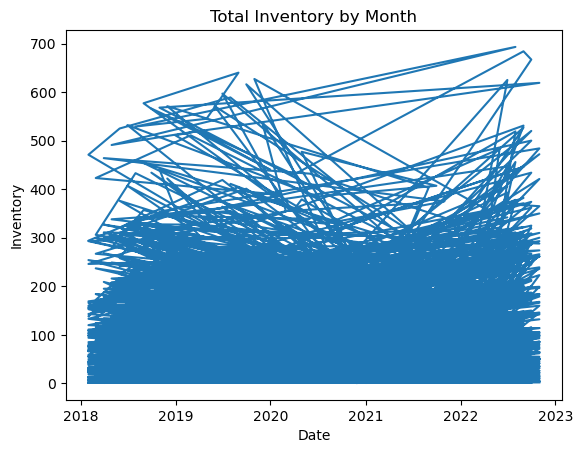

In [40]:
# Generate a line plot 

# Generate a line plot of inventory over time
x_axis = austin_df['date']
y_axis = austin_df['inventory'].groupby('')

plt.clf()  #clear Pyplot figure

plt.title(f"Total Inventory by Month")
plt.xlabel("Date")
plt.ylabel("Inventory")
plt.plot(x_axis, y_axis)

# Show the graph that we have created
plt.show()